In [8]:
import pandas as pd
df=pd.read_csv("mushroom-17.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [9]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [10]:
correlation_matrix = df.corr()
print(correlation_matrix)

              Unnamed: 0  stalk_height  cap_diameter
Unnamed: 0      1.000000     -0.001508      0.051881
stalk_height   -0.001508      1.000000     -0.003486
cap_diameter    0.051881     -0.003486      1.000000


C:\Users\gurra\AppData\Local\Temp\ipykernel_6044\2020863294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


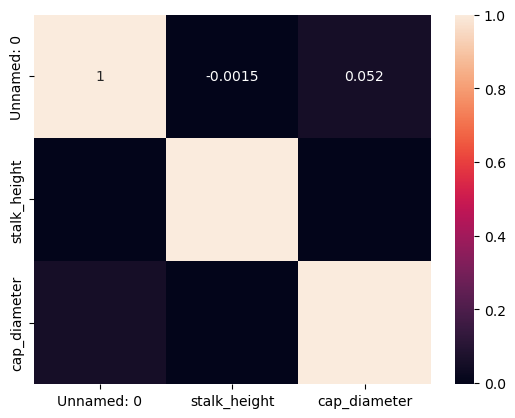

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.show()

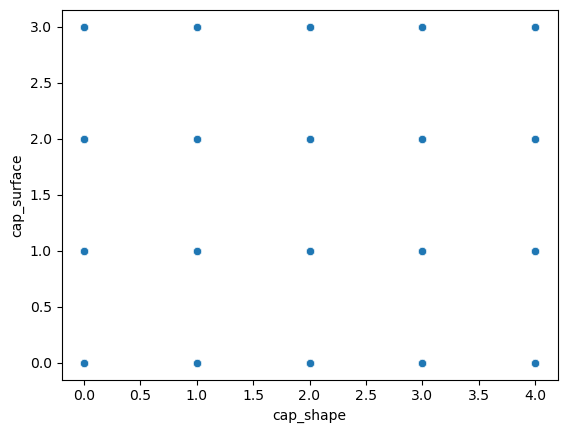

In [12]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = LE.fit_transform(df[column])
        from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sns.scatterplot(data=df, x="cap_shape", y="cap_surface") # Use 'cap_surface' instead of 'cap-surface'
plt.show()

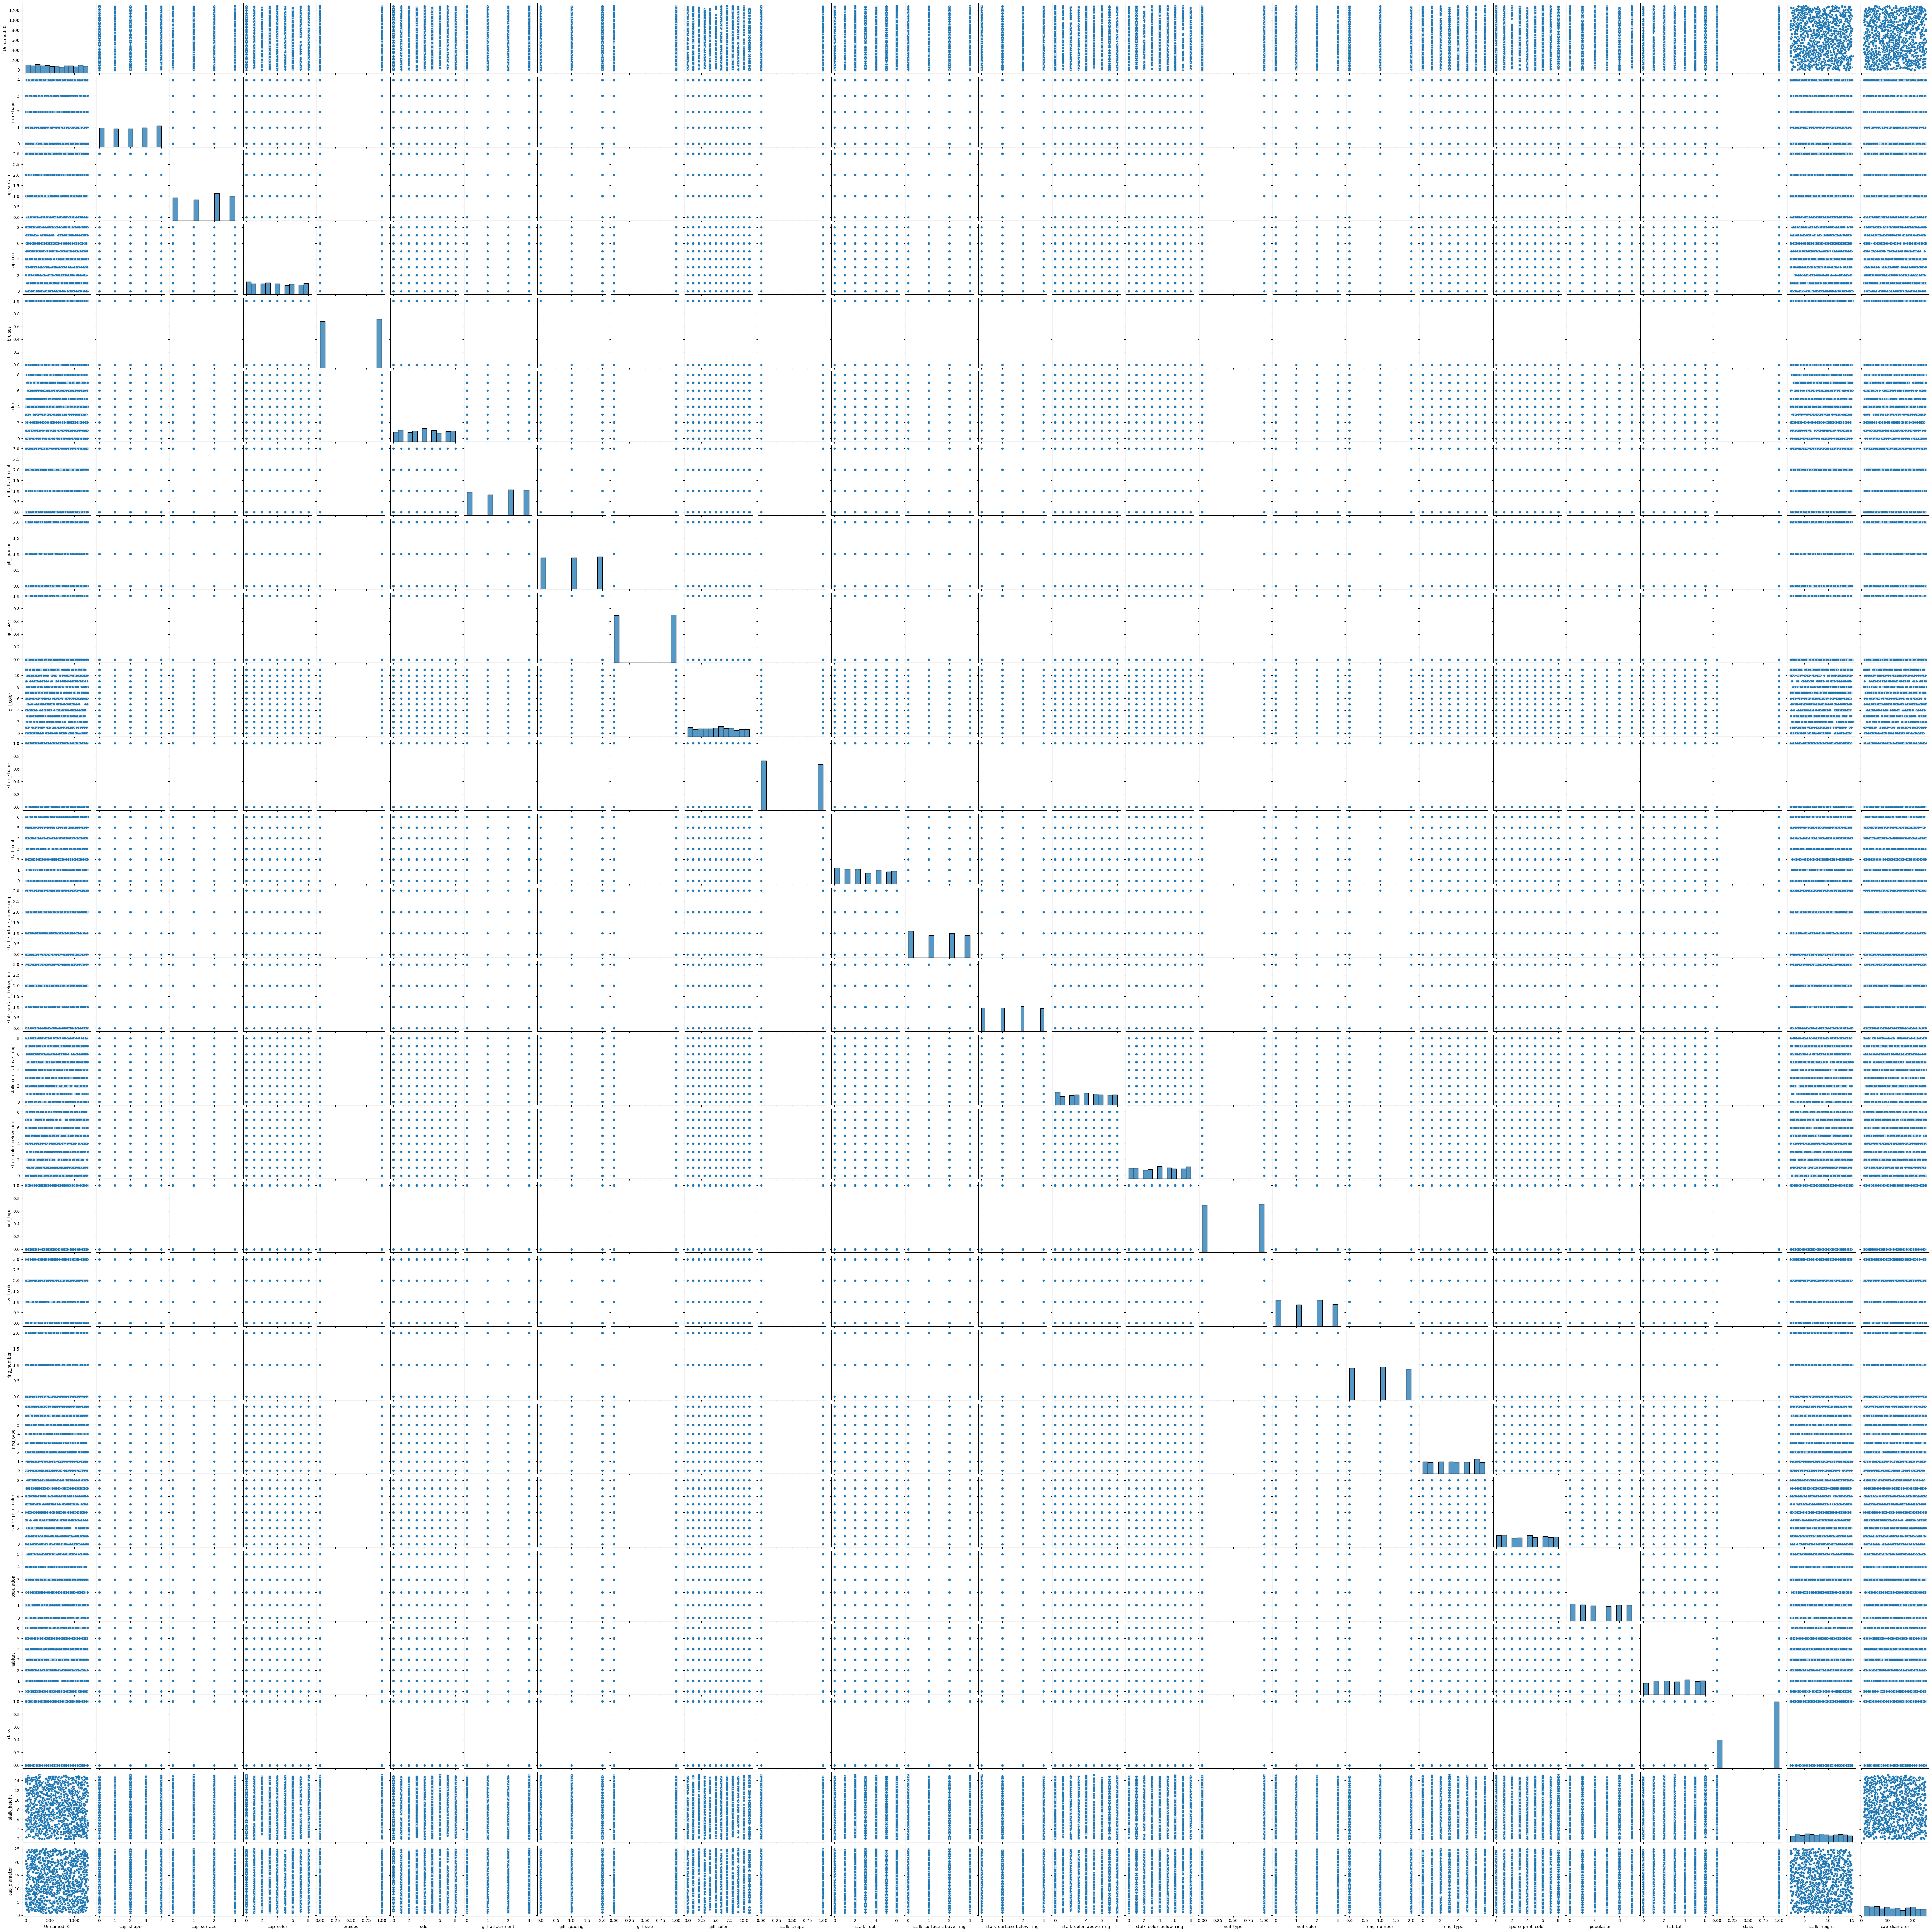

In [13]:
import seaborn as sns
sns.pairplot(df)
plt.show() 

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load a dataset (for example, the iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a basic SVM classifier
svm_model = SVC(kernel='linear', C=1.0)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Evaluate model performance on the testing data
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1) 


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


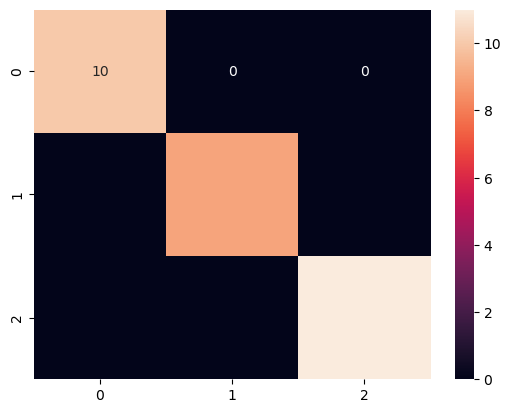

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 1. Predict class labels on the testing data
y_pred = svm_model.predict(X_test)

# 2. Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [10]:
# 1. Define different hyperparameter values to try
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
regularization_parameters = [0.1, 1.0, 10.0]

# 2. Initialize an empty list to store results
results = []

# 3. Loop over different hyperparameter combinations
for kernel in kernels:
    for C in regularization_parameters:
        # 3.1 Create a new SVM model with the current hyperparameters
        svm_model = SVC(kernel=kernel, C=C)

        # 3.2 Train the model on the training data
        svm_model.fit(X_train, y_train)

        # 3.3 Predict class labels on the testing data
        y_pred = svm_model.predict(X_test)

        # 3.4 Compute performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # 3.5 Store results in a dictionary
        results.append({
            'kernel': kernel,
            'C': C,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        })

# 4. Print the results
print(pd.DataFrame(results))

# 5. Select the hyperparameter combination with the best performance
best_params = pd.DataFrame(results).sort_values(by='f1', ascending=False).iloc[0]

# 6. Train a final SVM model with the best hyperparameters
svm_model = SVC(kernel=best_params['kernel'], C=best_params['C'])
svm_model.fit(X_train, y_train)

# 7. Evaluate the final model on the testing data
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


     kernel     C  accuracy  precision    recall        f1
0    linear   0.1  1.000000   1.000000  1.000000  1.000000
1    linear   1.0  1.000000   1.000000  1.000000  1.000000
2    linear  10.0  0.966667   0.969444  0.966667  0.966411
3      poly   0.1  1.000000   1.000000  1.000000  1.000000
4      poly   1.0  1.000000   1.000000  1.000000  1.000000
5      poly  10.0  1.000000   1.000000  1.000000  1.000000
6       rbf   0.1  0.966667   0.970000  0.966667  0.966750
7       rbf   1.0  1.000000   1.000000  1.000000  1.000000
8       rbf  10.0  1.000000   1.000000  1.000000  1.000000
9   sigmoid   0.1  0.300000   0.090000  0.300000  0.138462
10  sigmoid   1.0  0.300000   0.090000  0.300000  0.138462
11  sigmoid  10.0  0.133333   0.055556  0.133333  0.078431
Best Hyperparameters: kernel       linear
C               0.1
accuracy        1.0
precision       1.0
recall          1.0
f1              1.0
Name: 0, dtype: object
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'kernel': kernel, 'accuracy': accuracy})

print("SVM Performance Comparison by Kernel:")
print(pd.DataFrame(results))

SVM Performance Comparison by Kernel:
    kernel  accuracy
0   linear       1.0
1     poly       1.0
2      rbf       1.0
3  sigmoid       0.3


In [ ]:
## Strengths:
#   - Effective in high-dimensional spaces
#   - Robust to outliers
#   - Versatile due to different kernel options
## Weaknesses:
#   - Can be computationally expensive
#   - Sensitive to parameter selection
#   - Not easily interpretable


In [ ]:
## Practical implications of SVM
# - SVM is widely used in real-world classification tasks due to its effectiveness and versatility.
# - Some practical applications include:
#   - Image classification
#   - Text classification
#   - Spam detection
#   - Fraud detection
#   - Medical diagnosis